**Import the libraries**

In [1]:
# import numpy, pandas and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Load the dataset**

In [2]:
# load the dataset from Sklearn
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


In [ ]:
data

In [6]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
X = data.data
y = data.target
column_names = data.feature_names

In [8]:
df = pd.DataFrame(X, columns=column_names)
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


**Splitting the dataset into the Training set and Test set**

In [9]:
# import train_test_split from sklearn.model_selection and train the dataset to train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

**Feature Scaling**  
Feature scaling is a data preprocessing technique that involves transforming the values of features or variables in a dataset to a similar scale.  
This is done to ensure that all features contribute equally to the model and to prevent features with larger values from dominating the model.  
  
Feature scaling is essential when working with datasets where the features have different ranges, units of measurement, or orders of magnitude.  
  
Common feature scaling techniques include standardization, normalization, and min-max scaling. 

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)
print(X_test)

**Training the Logistic Regression model on the Training set**

In [12]:
# Load the MLPClassifier from sklearn.neural_network and fit the data
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=[16, 32, 64, 128 , 64, 32, 16], activation='relu')
classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=[16, 32, 64, 128, 64, 32, 16], max_iter=300,
              random_state=1)

**Predicting the Test set results**

In [13]:
# Make predictions with test data
y_pred = classifier.predict(X_test)

# Evaluating the model
**Accuracy**  
Accuracy is the percentage of the predictions that are correct  


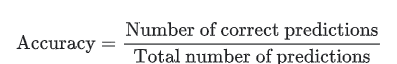

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.972027972027972

**Confusion Matrix**  


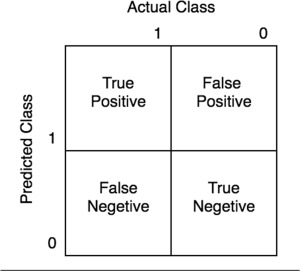

In [15]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[57  3]
 [ 1 82]]


Text(50.722222222222214, 0.5, 'Predicted Class')

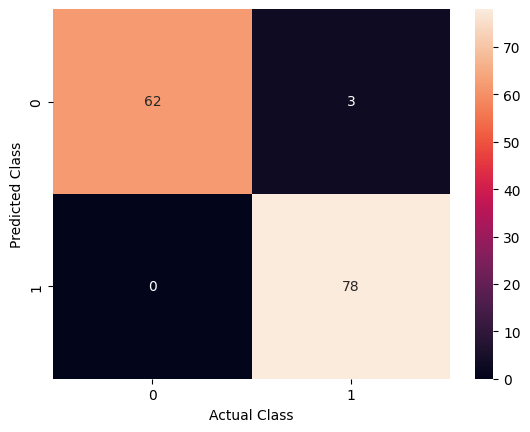

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')